**Sparse Gaussian Processes Complex Shear Modulus** 
---


Name : sparse_gp
Objective : 13403.74466195637
Number of Parameters : 1003
Number of Optimization Parameters : 1003
Updates : True
Parameters:
  sparse_gp.               |     value  |  constraints  |  priors
  inducing_inputs          |  (200, 5)  |               |        
  rbf.variance             |       0.5  |      +ve      |        
  rbf.lengthscale          |       1.0  |      +ve      |        
  Gaussian_noise.variance  |       1.0  |      +ve      |        


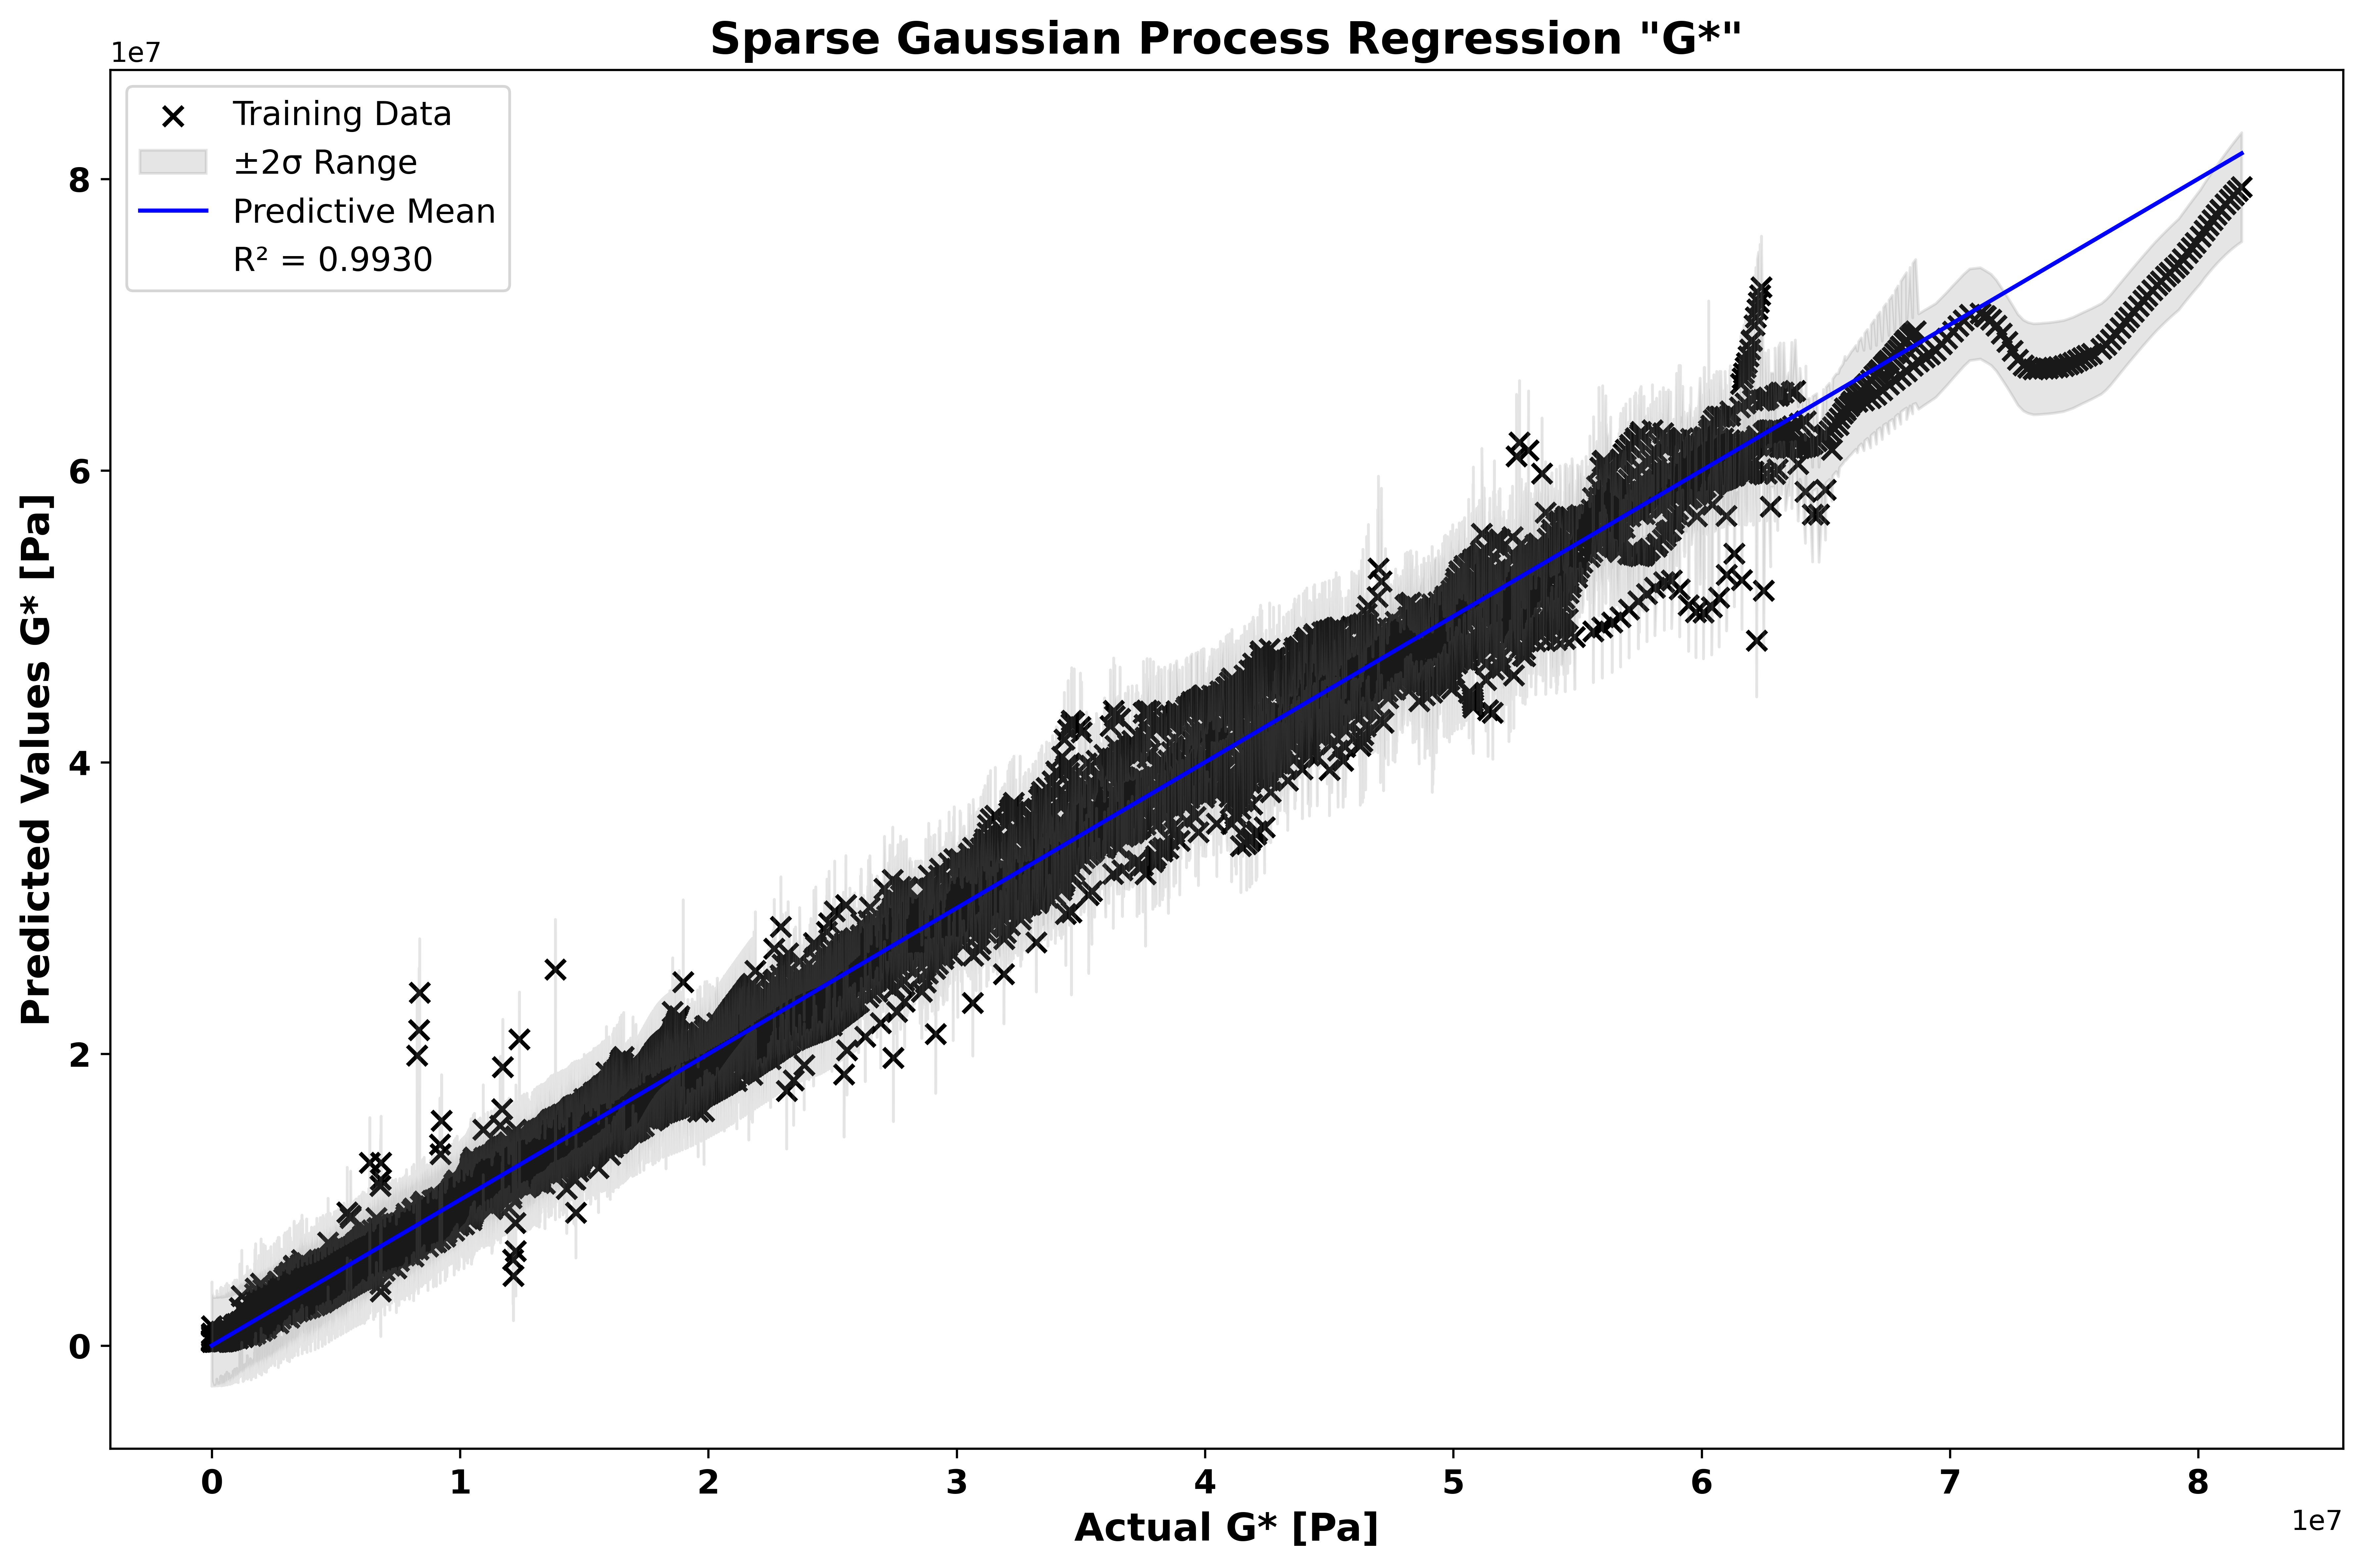

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import GPy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the data from the Excel file
file_path = r'M:\citg\se\WR\Moisture Damage\Mahmoud PhD\Publication\TwoScales Paper\Mastic\GP\True vs Predictions.xlsx'
data = pd.read_excel(file_path)

# Extract input and output parameters
X_train = data.iloc[:, :5].values  # First 5 columns as input
Y_train = data.iloc[:, -1].values.reshape(-1, 1)  # Last column as output

# Scale the input features
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)

# Scale the output
Y_scaler = StandardScaler()
Y_train_scaled = Y_scaler.fit_transform(Y_train)

# Define a kernel
kernel = GPy.kern.RBF(input_dim=5, variance=0.5, lengthscale=1)

# Define the number of inducing points
num_inducing = 200  # You can adjust this number

# Create inducing points (you might want to use a more sophisticated method to select these)
Z = X_train_scaled[np.random.choice(X_train_scaled.shape[0], num_inducing, replace=False)]

# Create a Sparse Gaussian Process model with scaled data
model = GPy.models.SparseGPRegression(X_train_scaled, Y_train_scaled, kernel, Z=Z)

# Display the model
print(model)

# Optimize the model parameters
model.optimize(messages=True)

# Make predictions on the scaled training data
Y_pred_scaled, V_pred_scaled = model.predict(X_train_scaled)

# Inverse transform the predictions back to original scale
Y_pred = Y_scaler.inverse_transform(Y_pred_scaled)
V_pred = V_pred_scaled * (Y_scaler.scale_**2)

# Calculate R-squared
r2 = r2_score(Y_train, Y_pred)

# Increase the figure size and significantly increase DPI for very high quality
plt.figure(figsize=(12, 8), dpi=600)

# Sort the data for proper plotting
sort_indices = np.argsort(Y_train.flatten())
Y_train_sorted = Y_train[sort_indices]
Y_pred_sorted = Y_pred[sort_indices]
V_pred_sorted = V_pred[sort_indices]

# Plot training data
plt.scatter(Y_train, Y_pred, c='k', marker='x', s=50, label='Training Data')

# Plot shaded area for uncertainty
plt.fill_between(Y_train_sorted.flatten(), 
                 Y_pred_sorted.flatten() - 2*np.sqrt(V_pred_sorted.flatten()), 
                 Y_pred_sorted.flatten() + 2*np.sqrt(V_pred_sorted.flatten()), 
                 color='gray', alpha=0.2, label='±2σ Range')

# Plot predictive mean line
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'b-', label='Predictive Mean')

# Add R-squared to legend
plt.plot([], [], ' ', label=f'R² = {r2:.4f}')

plt.title('Sparse Gaussian Process Regression "G*"', fontsize=16, fontweight='bold')
plt.xlabel('Actual G* [Pa]', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Values G* [Pa]', fontsize=14, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()

# Save the figure as a high-quality PNG
plt.savefig('high_quality_sparse_gp_plotG.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# Calculate upper and lower bounds
lower_bound = Y_pred - 2 * np.sqrt(V_pred)
upper_bound = Y_pred + 2 * np.sqrt(V_pred)

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Actual_G*': Y_train.flatten(),
    'Predicted_G*': Y_pred.flatten(),
    'Lower_Bound': lower_bound.flatten(),
    'Upper_Bound': upper_bound.flatten()
})

# Save results to Excel
output_file_path = r'M:\citg\se\WR\Moisture Damage\Mahmoud PhD\Publication\TwoScales Paper\Mastic\GP\GP_resultsG.xlsx.xlsx' 
results_df.to_excel(output_file_path, index=False)
print(f"Results saved to {output_file_path}")

Results saved to M:\citg\se\WR\Moisture Damage\Mahmoud PhD\Publication\TwoScales Paper\Mastic\GP\GP_resultsG.xlsx.xlsx



Name : sparse_gp
Objective : 13635.00131799563
Number of Parameters : 1003
Number of Optimization Parameters : 1003
Updates : True
Parameters:
  sparse_gp.               |     value  |  constraints  |  priors
  inducing_inputs          |  (200, 5)  |               |        
  rbf.variance             |       0.5  |      +ve      |        
  rbf.lengthscale          |       1.0  |      +ve      |        
  Gaussian_noise.variance  |       1.0  |      +ve      |        


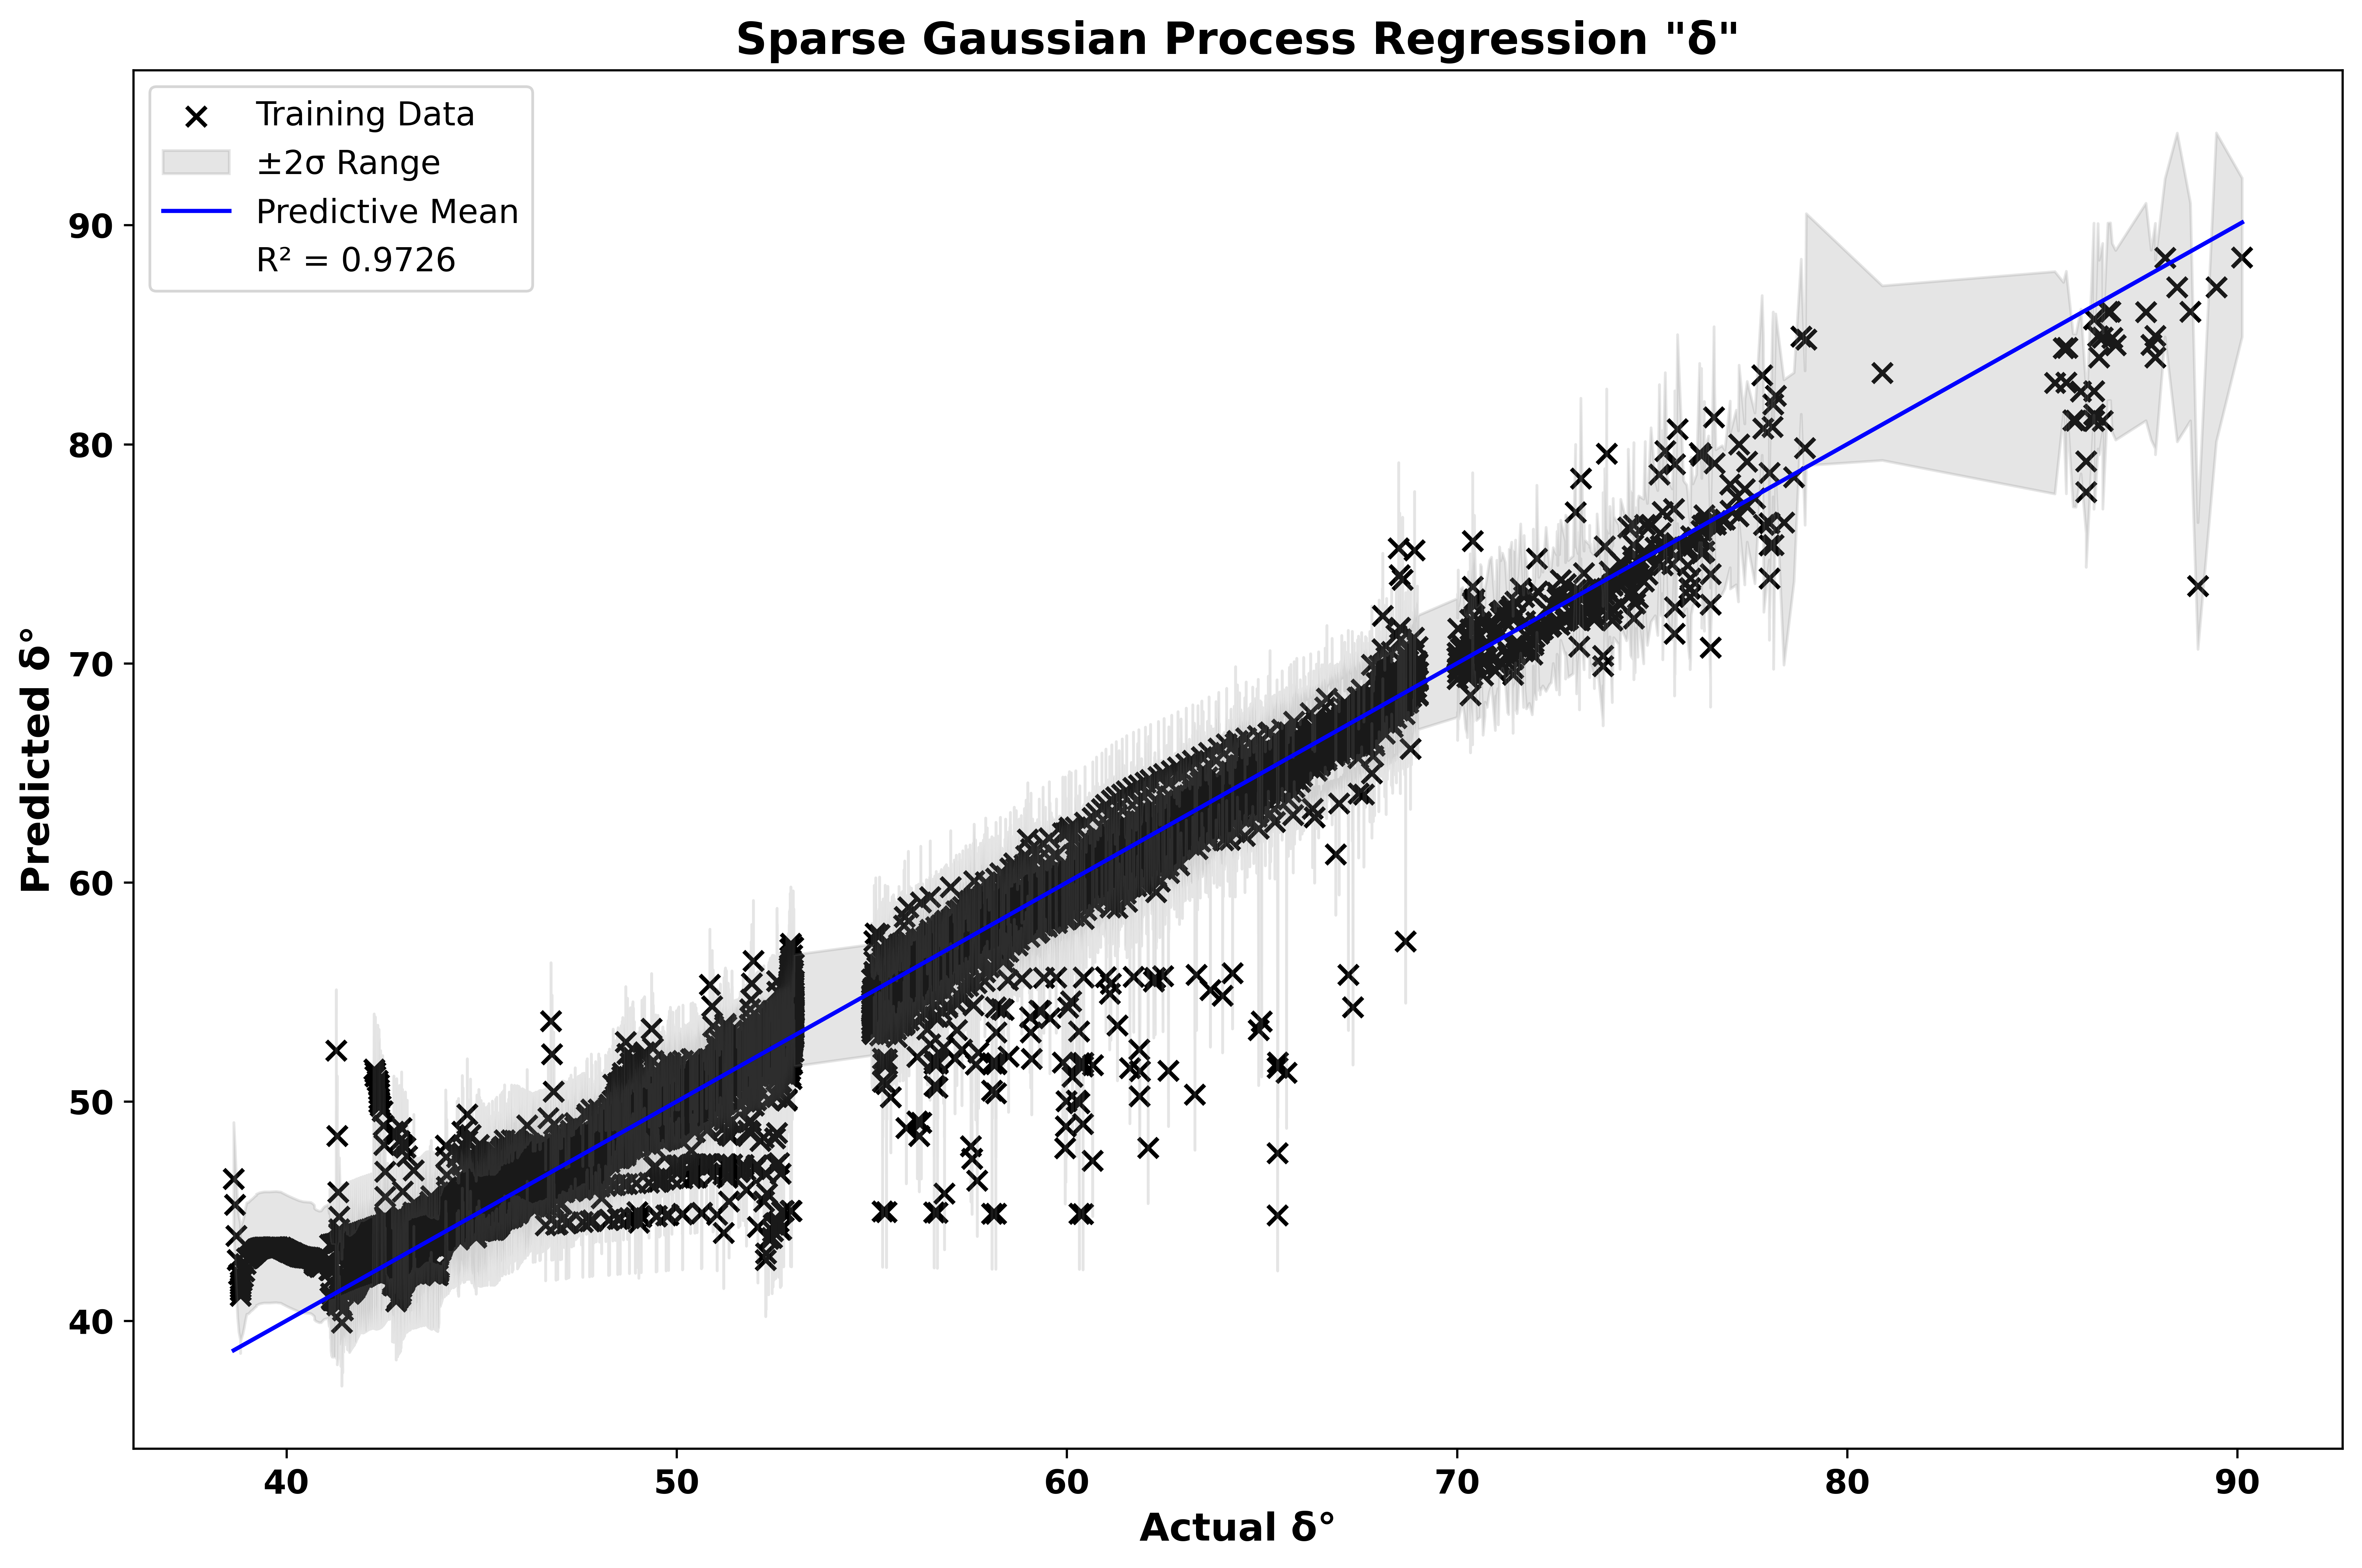

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import GPy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the data from the Excel file
file_path = r'M:\citg\se\WR\Moisture Damage\Mahmoud PhD\Publication\TwoScales Paper\Mastic\GP\True vs Predictions D.xlsx'
data = pd.read_excel(file_path)

# Extract input and output parameters
X_train = data.iloc[:, :5].values  # First 5 columns as input
Y_train = data.iloc[:, -1].values.reshape(-1, 1)  # Last column as output

# Scale the input features
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)

# Scale the output
Y_scaler = StandardScaler()
Y_train_scaled = Y_scaler.fit_transform(Y_train)

# Define a kernel
kernel = GPy.kern.RBF(input_dim=5, variance=0.5, lengthscale=1)

# Define the number of inducing points
num_inducing = 200  # You can adjust this number

# Create inducing points (you might want to use a more sophisticated method to select these)
Z = X_train_scaled[np.random.choice(X_train_scaled.shape[0], num_inducing, replace=False)]

# Create a Sparse Gaussian Process model with scaled data
model = GPy.models.SparseGPRegression(X_train_scaled, Y_train_scaled, kernel, Z=Z)

# Display the model
print(model)

# Optimize the model parameters
model.optimize(messages=True)

# Make predictions on the scaled training data
Y_pred_scaled, V_pred_scaled = model.predict(X_train_scaled)

# Inverse transform the predictions back to original scale
Y_pred = Y_scaler.inverse_transform(Y_pred_scaled)
V_pred = V_pred_scaled * (Y_scaler.scale_**2)

# Calculate R-squared
r2 = r2_score(Y_train, Y_pred)

# Increase the figure size and significantly increase DPI for very high quality
plt.figure(figsize=(12, 8), dpi=600)

# Sort the data for proper plotting
sort_indices = np.argsort(Y_train.flatten())
Y_train_sorted = Y_train[sort_indices]
Y_pred_sorted = Y_pred[sort_indices]
V_pred_sorted = V_pred[sort_indices]

# Plot training data
plt.scatter(Y_train, Y_pred, c='k', marker='x', s=50, label='Training Data')

# Plot shaded area for uncertainty
plt.fill_between(Y_train_sorted.flatten(), 
                 Y_pred_sorted.flatten() - 2*np.sqrt(V_pred_sorted.flatten()), 
                 Y_pred_sorted.flatten() + 2*np.sqrt(V_pred_sorted.flatten()), 
                 color='gray', alpha=0.2, label='±2σ Range')

# Plot predictive mean line
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'b-', label='Predictive Mean')

# Add R-squared to legend
plt.plot([], [], ' ', label=f'R² = {r2:.4f}')

plt.title('Sparse Gaussian Process Regression "δ"', fontsize=16, fontweight='bold')
plt.xlabel('Actual δ°', fontsize=14, fontweight='bold')
plt.ylabel('Predicted δ°', fontsize=14, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()

# Save the figure as a high-quality PNG
plt.savefig('high_quality_gp_plotD.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Calculate upper and lower bounds
lower_bound = Y_pred - 2 * np.sqrt(V_pred)
upper_bound = Y_pred + 2 * np.sqrt(V_pred)

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Actual_D': Y_train.flatten(),
    'Predicted_D': Y_pred.flatten(),
    'Lower_Bound': lower_bound.flatten(),
    'Upper_Bound': upper_bound.flatten()
})

# Save results to Excel
output_file_path = r'M:\citg\se\WR\Moisture Damage\Mahmoud PhD\Publication\TwoScales Paper\Mastic\GP\GP_resultsD.xlsx.xlsx' 
results_df.to_excel(output_file_path, index=False)
print(f"Results saved to {output_file_path}")

Results saved to M:\citg\se\WR\Moisture Damage\Mahmoud PhD\Publication\TwoScales Paper\Mastic\GP\GP_resultsD.xlsx.xlsx
